In [1]:
import importlib_resources
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.linalg import svd

from sklearn.preprocessing import StandardScaler

import seaborn as sns

## Data loading

In [2]:
filename = 'data/abalone.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(filename)


#clean the column names
df.columns = df.columns.str.replace('"', '')
df.columns = df.columns.str.strip()

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
raw_data = df.values

y = raw_data[:, 8].astype(float) + 1.5  # Rings + 1.5 for age
print(y)

[1.5 1.5 2.5 ... 1.5 2.5 1.5]


### X without including Sex

In [ ]:
cols = range(1, 8) 

X = raw_data[:, cols]

#print(X)

attributeNames = np.asarray(df.columns[cols])

print(attributeNames)

['Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight']


In [6]:
for i in range(2):
    outlier_max = np.argmax(X[:,2])
    X = np.delete(X, (outlier_max), axis=0)
    y = np.delete(y, (outlier_max), axis=0)
    outlier_min = np.argmin(X[:,2])
    X = np.delete(X, (outlier_min), axis=0)
    y = np.delete(y, (outlier_min), axis=0)

In [7]:
N, M = X.shape # number of rows (samples) and columns (attributes)

N, M

(4173, 7)

### X including Sex as 3 different variables

In [8]:
#One-Hot Encoding of the Sex column
df_dummies = df.copy()
df_dummies = pd.get_dummies(df_dummies, columns=['Sex'], drop_first=False)

df_dummies['Sex_F'] = df_dummies['Sex_F'].astype(int)
df_dummies['Sex_M'] = df_dummies['Sex_M'].astype(int)
df_dummies['Sex_I'] = df_dummies['Sex_I'].astype(int)

df_dummies.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [9]:
raw_data = df_dummies.values


cols = [0,1,2,3,4,5,6,8,9,10]

X_OH = raw_data[:, cols]

#print(X)

attributeNames_OH = np.asarray(df_dummies.columns[cols])

print(attributeNames_OH)

['Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight' 'Sex_F' 'Sex_I' 'Sex_M']


In [ ]:
for i in range(2):
    outlier_max = np.argmax(X_OH[:,2])
    X_OH = np.delete(X_OH, (outlier_max), axis=0)
    outlier_min = np.argmin(X_OH[:,2])
    X_OH = np.delete(X_OH, (outlier_min), axis=0)

In [ ]:
N_OH, M_OH = X_OH.shape # number of rows (samples) and columns (attributes)

N_OH, M_OH

(4173, 10)

## QUITAR OUTLIERS

## PCA - including Sex

## PCA - without Sex

In [11]:
X = np.array(X, dtype=np.float64)

# Subtract the mean from the data
#Y1 = X - np.ones((N, 1)) * X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset

#stand_X = X - np.ones((N, 1)) * X.mean(0)
#stand_X = stand_X * (1 / np.std(stand_X, 0))

#stand_X = np.array(stand_X, dtype=np.float64)

In [12]:
scaler = StandardScaler()
stand_X = scaler.fit_transform(X)  # Standardize features
stand_X = np.array(stand_X, dtype=np.float64)

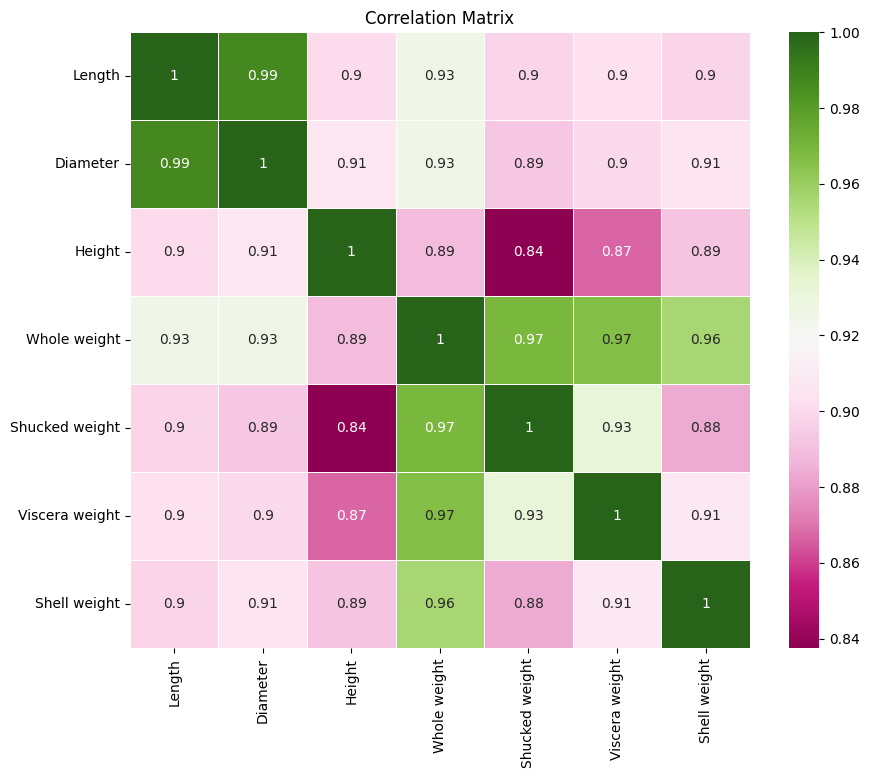

In [13]:
# Calculate the correlation matrix using NumPy
correlation_matrix = np.corrcoef(stand_X, rowvar=False)

# Create the correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', xticklabels=attributeNames, yticklabels=attributeNames, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

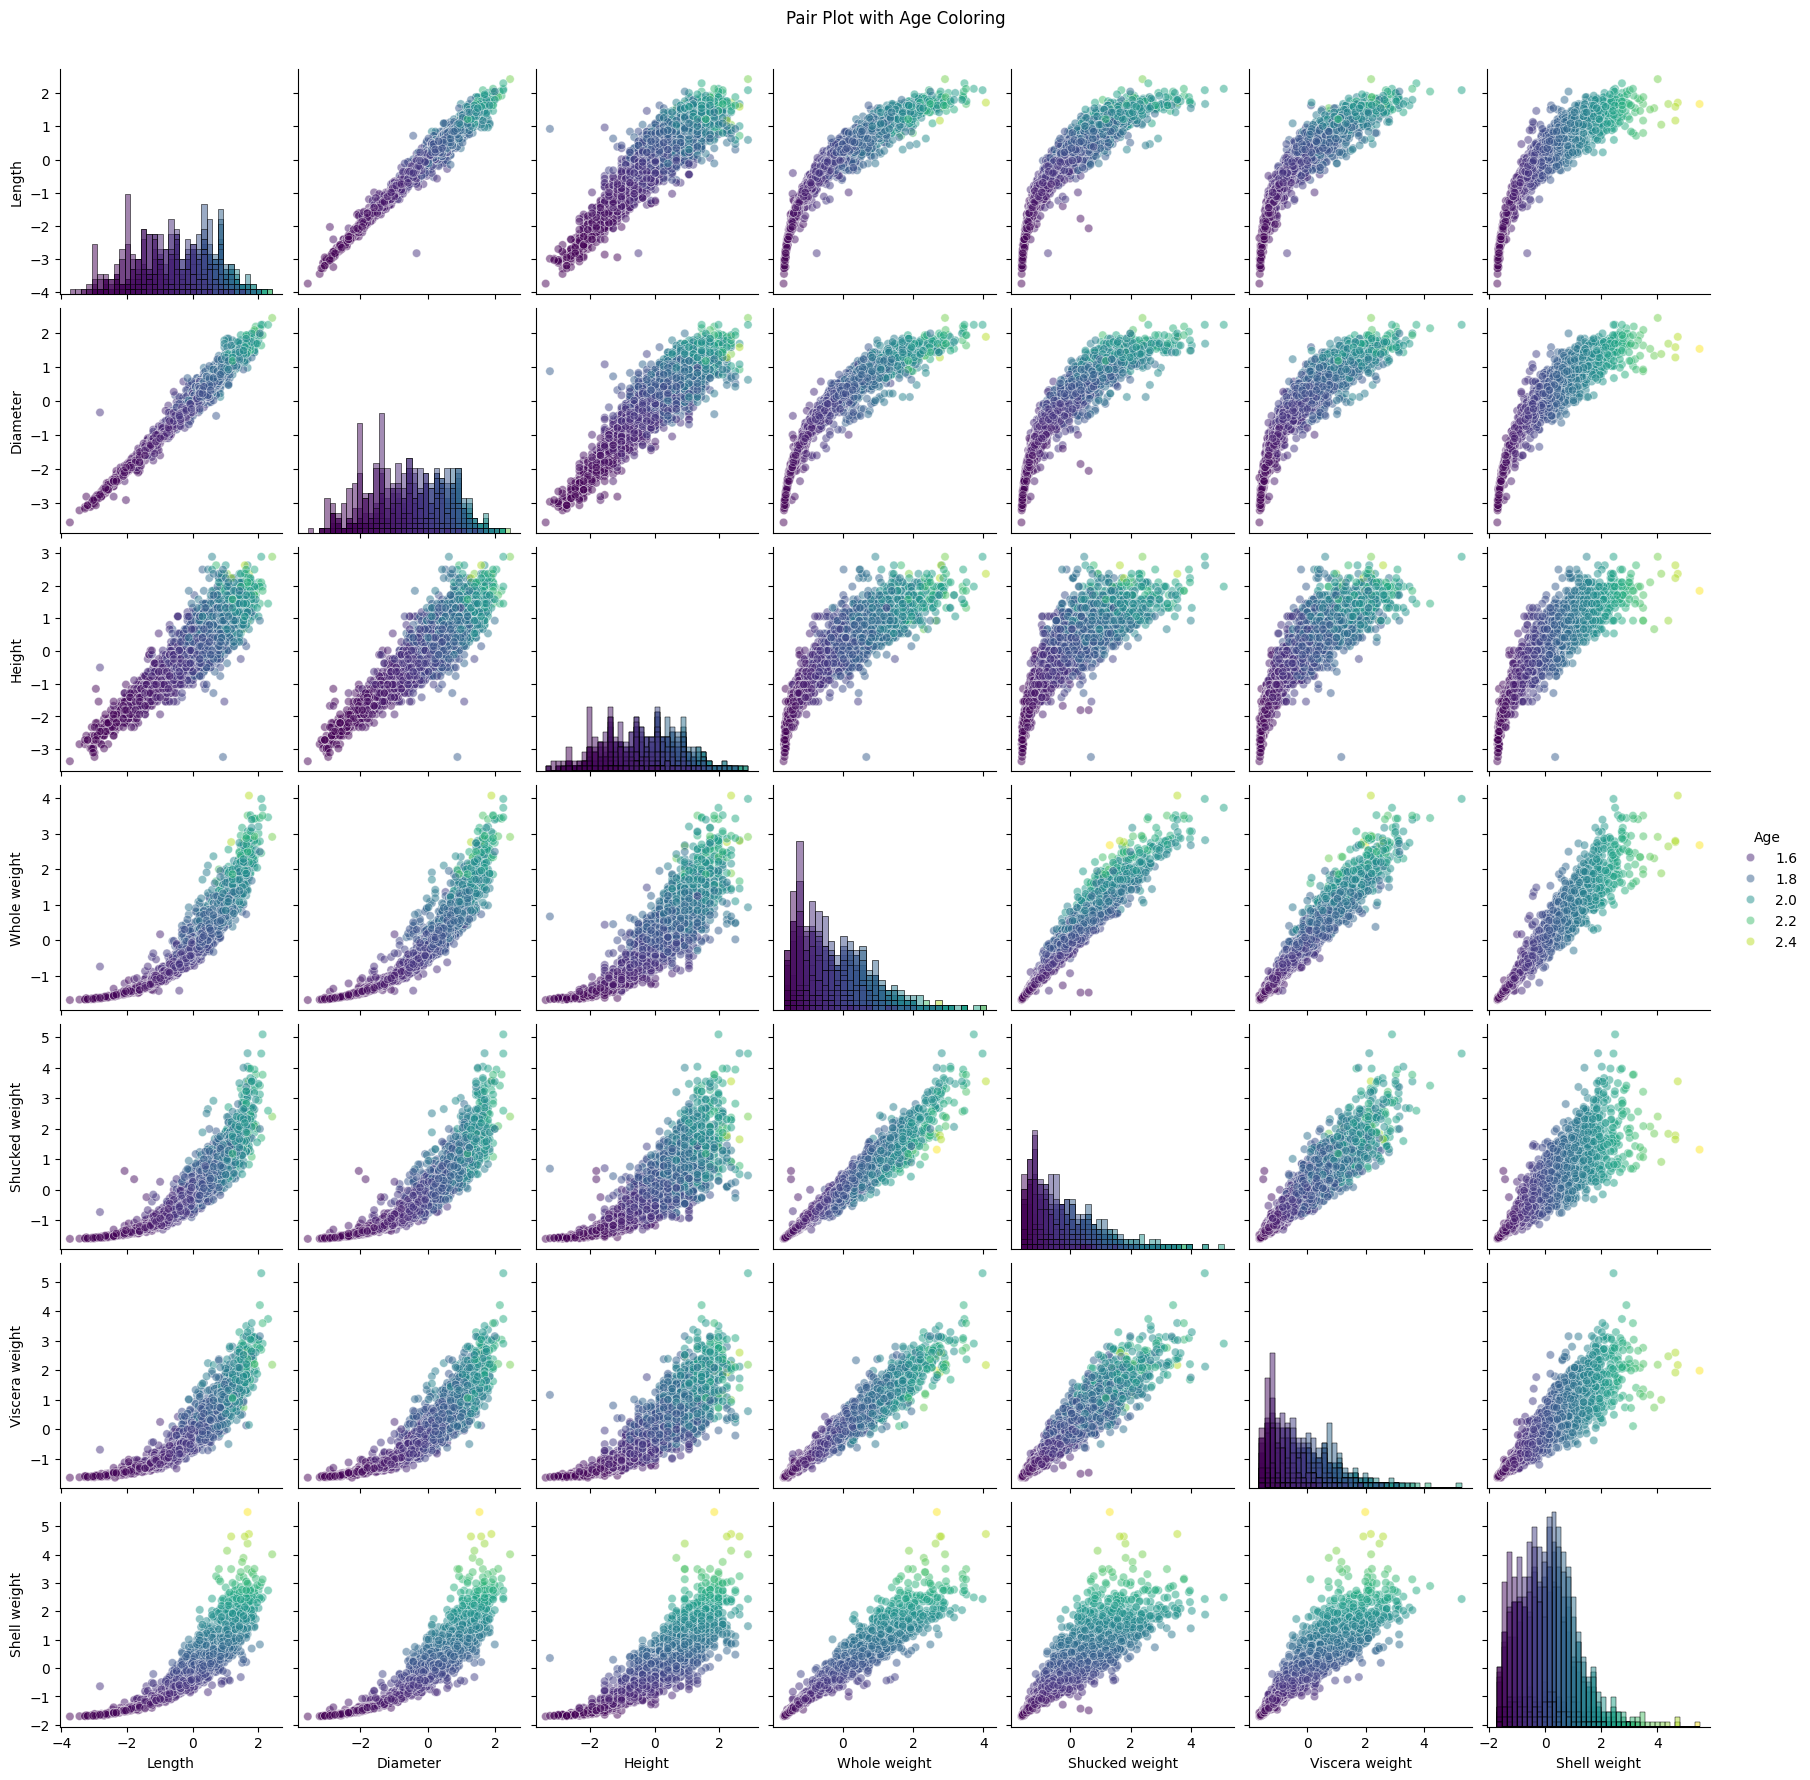

In [15]:
# Create a DataFrame
df = pd.DataFrame(stand_X, columns=attributeNames)
df['Age'] = y

# Create the pair plot with color coding
sns.pairplot(df, hue='Age', palette='viridis', diag_kind='hist', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot with Age Coloring', y=1.02)
plt.show()

 **PCA by computing SVD of Y**

In [17]:
#X = np.array(X, dtype=np.float64)

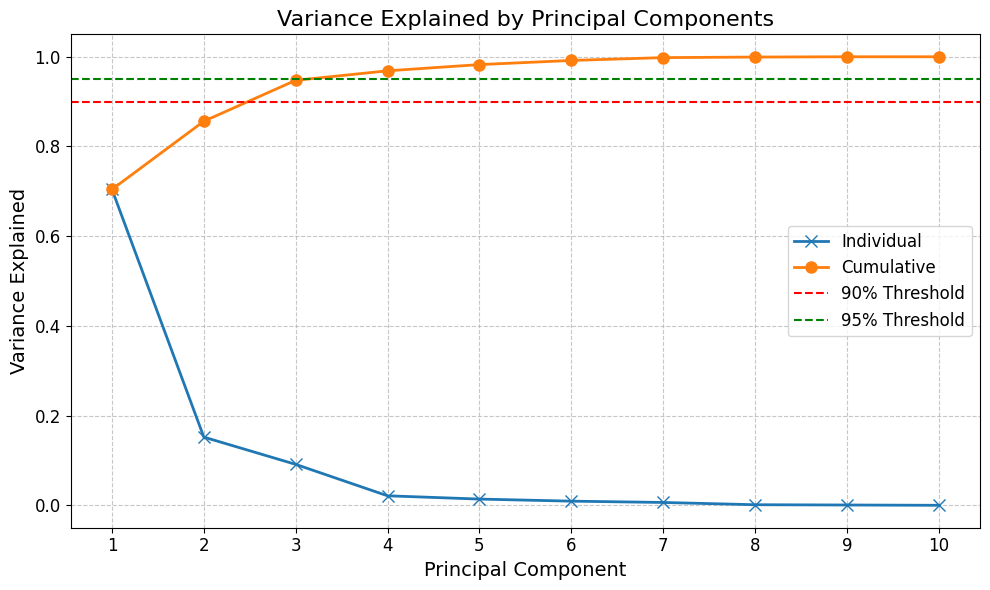

In [18]:
# Subtract mean value from data
# Note: Here we use Y to in teh book we often use X with a hat-symbol on top.
Y = stand_X - np.ones((N, 1)) * stand_X.mean(axis=0)

# Note: Here we call the Sigma matrix in the SVD S for notational convinience
U, S, Vh = svd(Y, full_matrices=False)

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Compute variance explained by principal components 
# Note: This is an important equation, see Eq. 3.18 on page 40 in the book.
rho = (S * S) / (S * S).sum()

#threshold = 0.9

plt.figure(figsize=(10, 6))

plt.plot(range(1, len(rho) + 1), rho, "x-", label="Individual", markersize=8, linewidth=2)
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-", label="Cumulative", markersize=8, linewidth=2)

# Plot the threshold lines
plt.axhline(y=0.9, color="red", linestyle="--", label="90% Threshold")
plt.axhline(y=0.95, color="green", linestyle="--", label="95% Threshold")

# Add titles and labels
plt.title("Variance Explained by Principal Components", fontsize=16)
plt.xlabel("Principal Component", fontsize=14)
plt.ylabel("Variance Explained", fontsize=14)
plt.xticks(range(1, len(rho) + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


Plot above shows **the amount of variance explained as a function of the number of PCA components included.**

More than the 95% of the variabily is explained with the first two component, which leads us to think that we don't need more components.

**The data projected onto the considered principal components, e.g.  in 2D scatter plots(hint: it may be helpful to color code the points according to the value of the attributeyou wish to predict).**

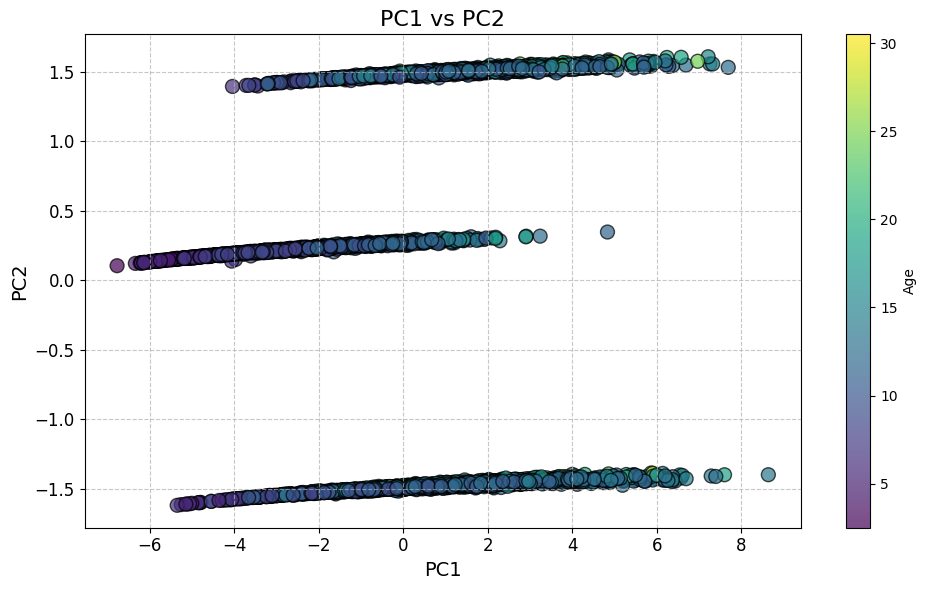

In [19]:
# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted (PC1 and PC2)
i = 0
j = 1

# Plot PCA of the data
plt.figure(figsize=(10, 6))
plt.scatter(Z[:, i], Z[:, j], c=y, cmap="viridis", alpha=0.7, edgecolor='k', s=100)
plt.colorbar(label="Age")
plt.title("PC1 vs PC2", fontsize=16)
plt.xlabel(f"PC{i+1}", fontsize=14)
plt.ylabel(f"PC{j+1}", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

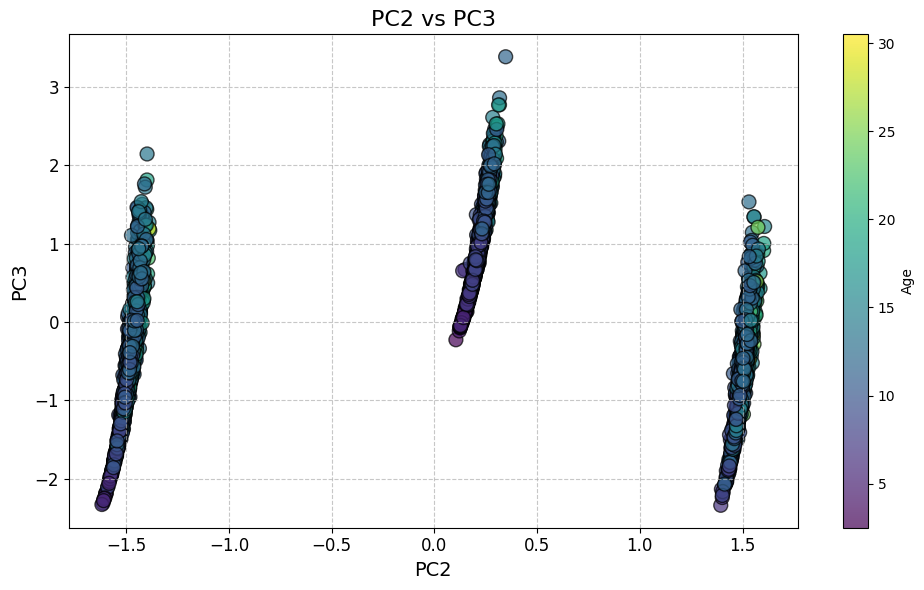

In [20]:
i = 1
j = 2

# Plot PCA of the data
plt.figure(figsize=(10, 6))
plt.scatter(Z[:, i], Z[:, j], c=y, cmap="viridis", alpha=0.7, edgecolor='k', s=100)
plt.colorbar(label="Age")
plt.title("PC2 vs PC3", fontsize=16)
plt.xlabel(f"PC{i+1}", fontsize=14)
plt.ylabel(f"PC{j+1}", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

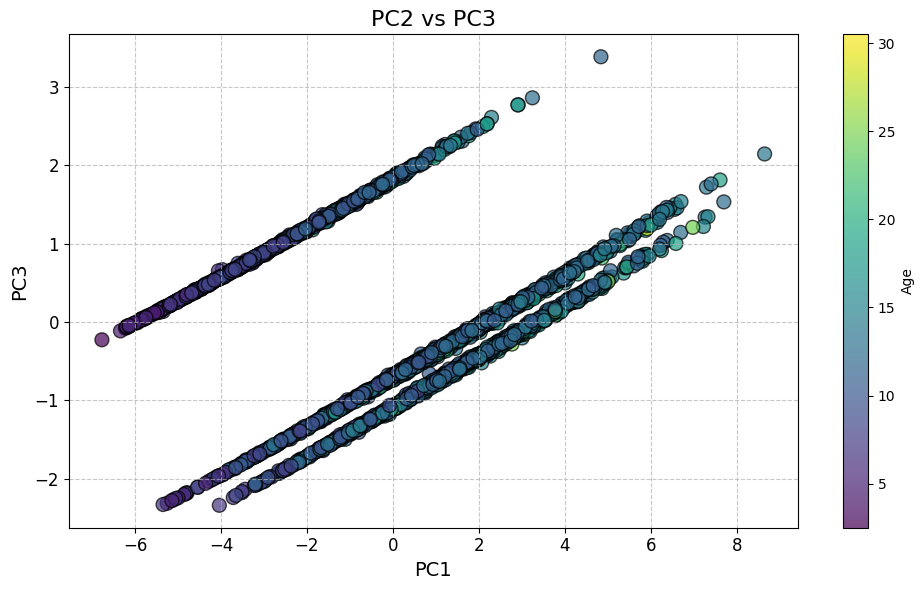

In [25]:
i = 0
j = 2

# Plot PCA of the data
plt.figure(figsize=(10, 6))
plt.scatter(Z[:, i], Z[:, j], c=y, cmap="viridis", alpha=0.7, edgecolor='k', s=100)
plt.colorbar(label="Age")
plt.title("PC2 vs PC3", fontsize=16)
plt.xlabel(f"PC{i+1}", fontsize=14)
plt.ylabel(f"PC{j+1}", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/45/_g835zvx6t3bqdvj9qw669qr0000gn/T/ipykernel_44775/713544722.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


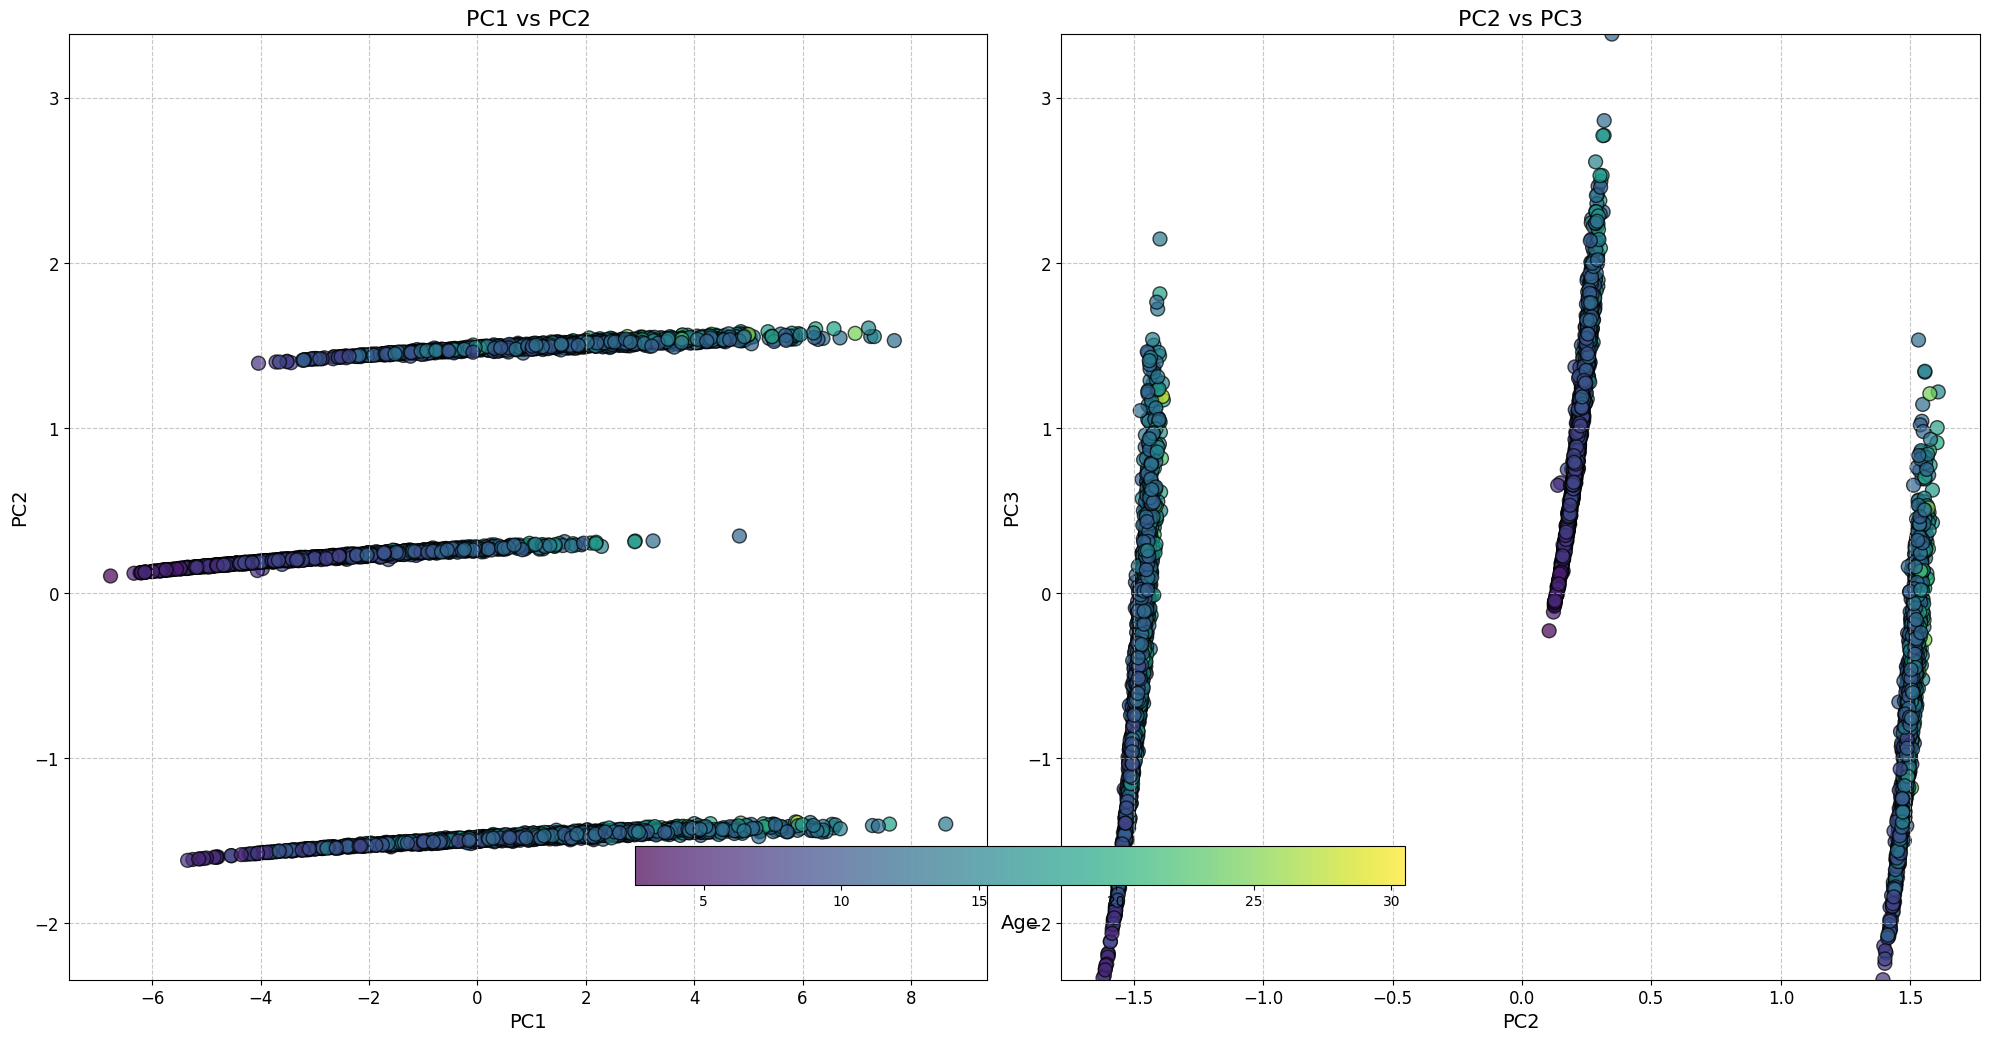

In [21]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Determine the limits for the Y-axis to ensure the same scale
y_limits = [min(Z[:, 1].min(), Z[:, 2].min()), max(Z[:, 1].max(), Z[:, 2].max())]

# Plot PC1 vs PC2
i, j = 0, 1
scatter1 = axes[0].scatter(Z[:, i], Z[:, j], c=y, cmap="viridis", alpha=0.7, edgecolor='k', s=100)
axes[0].set_title("PC1 vs PC2", fontsize=16)
axes[0].set_xlabel(f"PC{i+1}", fontsize=14)
axes[0].set_ylabel(f"PC{j+1}", fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_ylim(y_limits)

# Plot PC2 vs PC3
i, j = 1, 2
scatter2 = axes[1].scatter(Z[:, i], Z[:, j], c=y, cmap="viridis", alpha=0.7, edgecolor='k', s=100)
axes[1].set_title("PC2 vs PC3", fontsize=16)
axes[1].set_xlabel(f"PC{i+1}", fontsize=14)
axes[1].set_ylabel(f"PC{j+1}", fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_ylim(y_limits)

# Add a colorbar at the bottom
cbar = fig.colorbar(scatter2, ax=axes, orientation='horizontal', fraction=0.05, pad=0.5)
cbar.set_label("Age", fontsize=14)

plt.tight_layout()
plt.show()


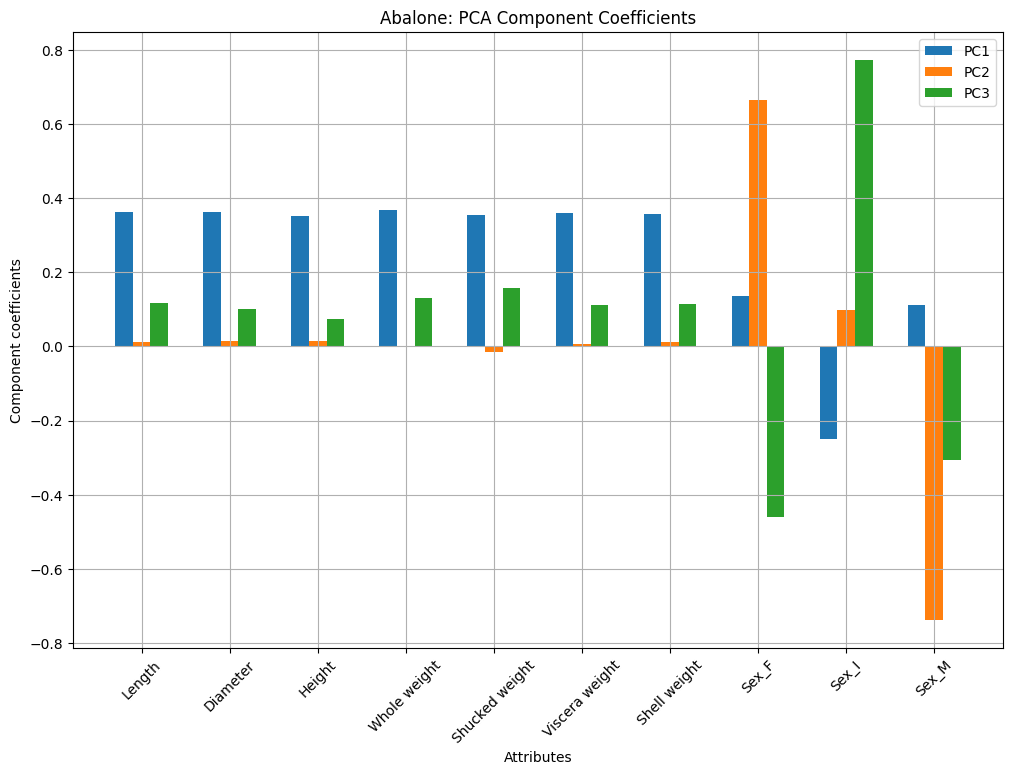

In [22]:
#N, M = stand_X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)

plt.figure(figsize=(12, 8))

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)

plt.xticks(r + bw,attributeNames, rotation = 45)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Abalone: PCA Component Coefficients")
plt.show()

To visualize the relative importance of each feature in each PC

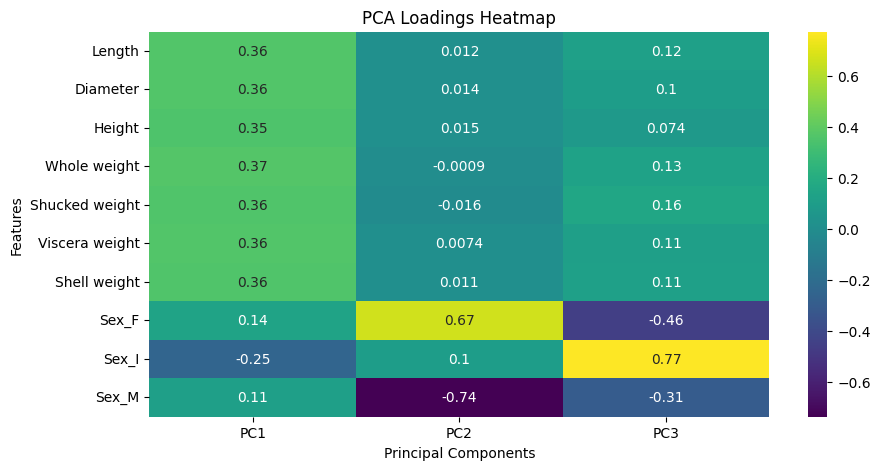

In [23]:
import seaborn as sns  

plt.figure(figsize=(10, 5))
sns.heatmap(V[:, :3], annot=True, cmap="viridis", xticklabels=["PC1", "PC2", "PC3"], yticklabels=attributeNames)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()


All the variables contribute more or less the same to the first component.

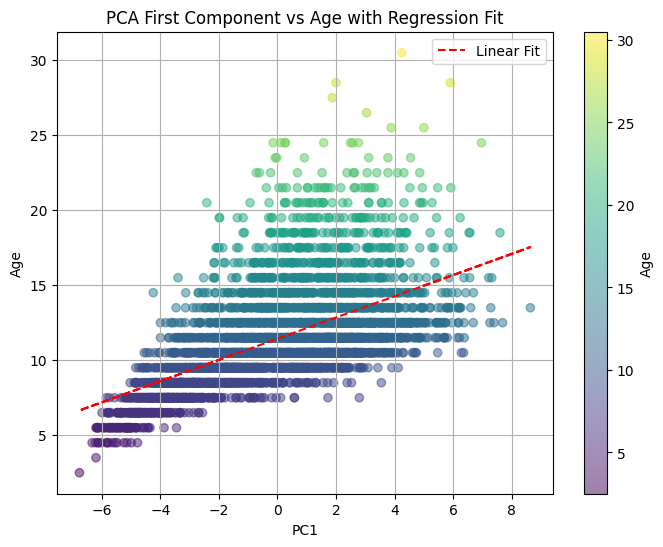

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit a simple regression model to PC1 vs Age
reg = LinearRegression()
reg.fit(Z[:, [0]], y)
y_pred = reg.predict(Z[:, [0]])

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], y, c=y, cmap="viridis", alpha=0.5)
plt.plot(Z[:, 0], y_pred, "r--", label="Linear Fit")
plt.colorbar(label="Age")
plt.xlabel("PC1")
plt.ylabel("Age")
plt.title("PCA First Component vs Age with Regression Fit")
plt.legend()
plt.grid()
plt.show()